<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/suplementary_9_2_Customized_Visualizations_using_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

earthquake_data = pd.read_csv('earthquakes-1.csv')

fb_stock_data = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')

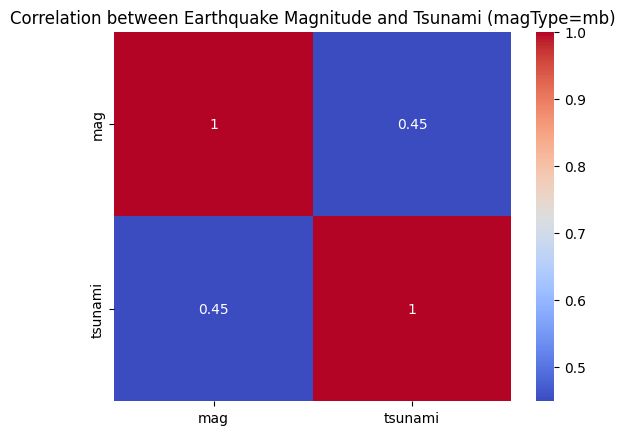

In [2]:
# Filter earthquake data
earthquake_mb = earthquake_data[(earthquake_data['magType'] == 'mb')]

# Calculate correlation matrix
correlation_matrix = earthquake_mb[['mag', 'tsunami']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Earthquake Magnitude and Tsunami (magType=mb)')
plt.show()

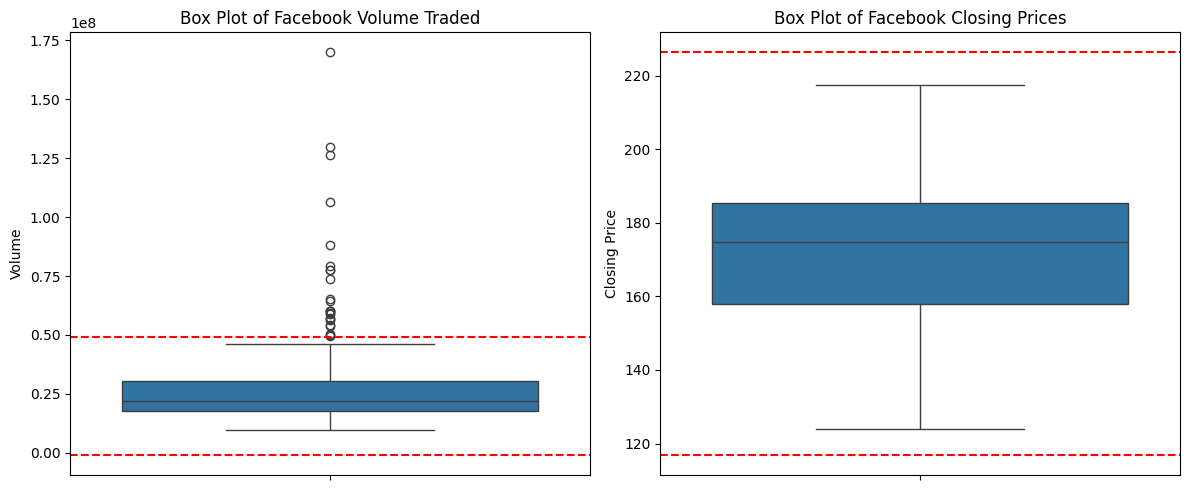

In [3]:
# Calculate Tukey fence bounds
Q1_volume = fb_stock_data['volume'].quantile(0.25)
Q3_volume = fb_stock_data['volume'].quantile(0.75)
IQR_volume = Q3_volume - Q1_volume
lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume

Q1_close = fb_stock_data['close'].quantile(0.25)
Q3_close = fb_stock_data['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close
lower_bound_close = Q1_close - 1.5 * IQR_close
upper_bound_close = Q3_close + 1.5 * IQR_close

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot box plots
sns.boxplot(y=fb_stock_data['volume'], ax=axes[0])
axes[0].axhline(y=lower_bound_volume, color='r', linestyle='--')
axes[0].axhline(y=upper_bound_volume, color='r', linestyle='--')
axes[0].set_title('Box Plot of Facebook Volume Traded')
axes[0].set_ylabel('Volume')

sns.boxplot(y=fb_stock_data['close'], ax=axes[1])
axes[1].axhline(y=lower_bound_close, color='r', linestyle='--')
axes[1].axhline(y=upper_bound_close, color='r', linestyle='--')
axes[1].set_title('Box Plot of Facebook Closing Prices')
axes[1].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()

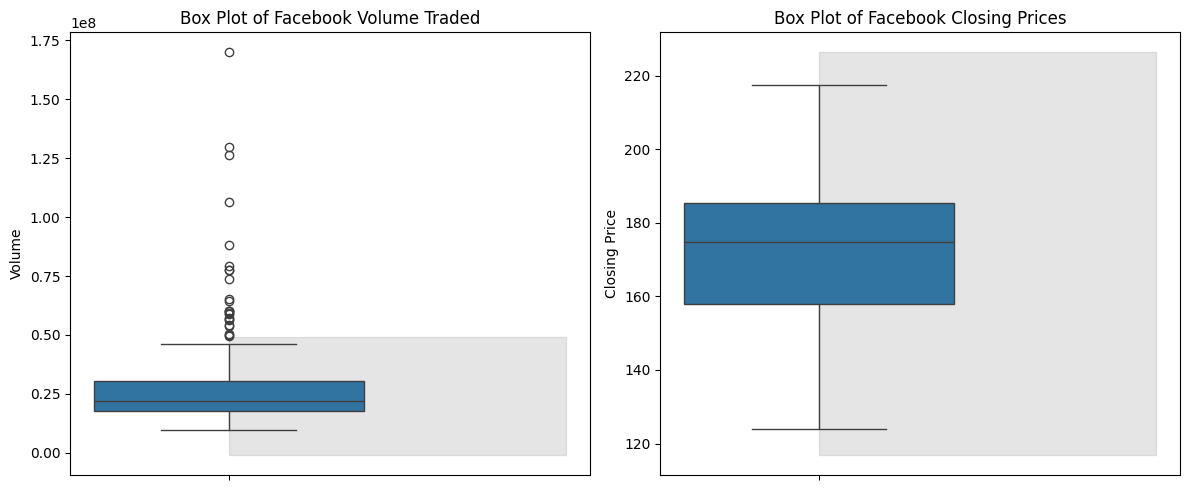

In [4]:
# Replot box plot with filled area
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.boxplot(y=fb_stock_data['volume'], ax=axes[0])
axes[0].fill_between([0, 1], lower_bound_volume, upper_bound_volume, color='gray', alpha=0.2)
axes[0].set_title('Box Plot of Facebook Volume Traded')
axes[0].set_ylabel('Volume')

sns.boxplot(y=fb_stock_data['close'], ax=axes[1])
axes[1].fill_between([0, 1], lower_bound_close, upper_bound_close, color='gray', alpha=0.2)
axes[1].set_title('Box Plot of Facebook Closing Prices')
axes[1].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()

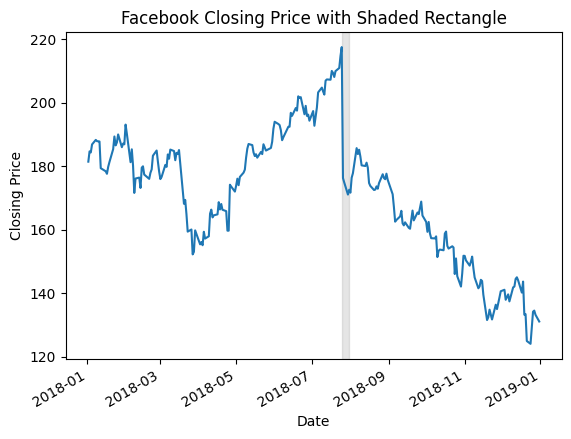

In [5]:
# Plot closing price
fb_stock_data['close'].plot()

# Shade rectangle
plt.axvspan('2018-07-25', '2018-07-31', color='gray', alpha=0.2)

plt.title('Facebook Closing Price with Shaded Rectangle')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

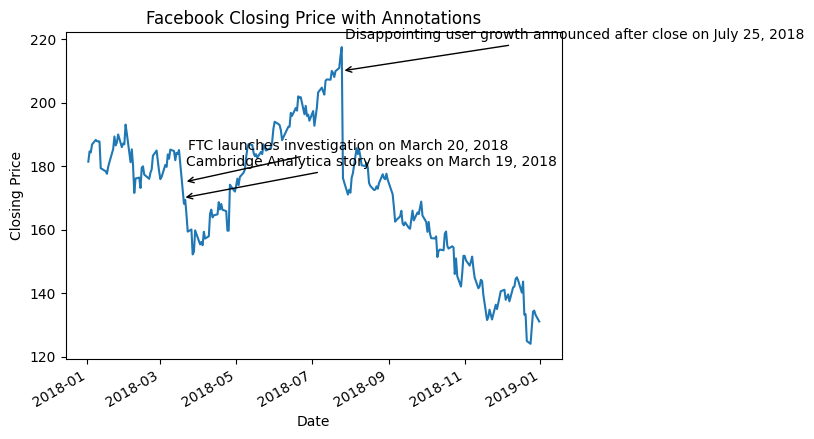

In [6]:
# Plot closing price
fb_stock_data['close'].plot()

# Annotate events
plt.annotate('Disappointing user growth announced after close on July 25, 2018', xy=('2018-07-25', 210), xytext=('2018-07-28', 220),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('Cambridge Analytica story breaks on March 19, 2018', xy=('2018-03-19', 170), xytext=('2018-03-22', 180),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate('FTC launches investigation on March 20, 2018', xy=('2018-03-20', 175), xytext=('2018-03-23', 185),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Facebook Closing Price with Annotations')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

<ipython-input-8-b65a84bba519>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(resid_colormap)(residuals / max(residuals))  # Normalize residuals and apply colormap


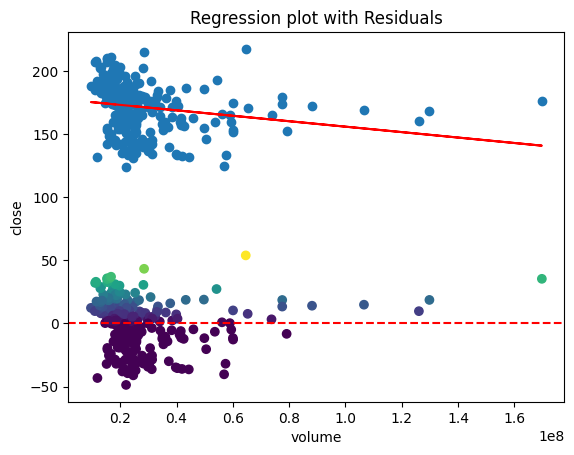

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def reg_resid_plots(data, x, y, resid_colormap='viridis'):
    """Create a scatter plot with a regression line and residuals."""
    # Fit the regression line
    fit = np.polyfit(data[x], data[y], 1)
    fit_fn = np.poly1d(fit)

    # Calculate residuals
    residuals = data[y] - fit_fn(data[x])

    # Plot data and regression line
    plt.scatter(data[x], data[y])
    plt.plot(data[x], fit_fn(data[x]), color='red')

    # Use colormap for residuals
    colors = cm.get_cmap(resid_colormap)(residuals / max(residuals))  # Normalize residuals and apply colormap
    plt.scatter(data[x], residuals, color=colors)

    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Regression plot with Residuals')
    plt.show()

# Example usage:
reg_resid_plots(fb_stock_data, 'volume', 'close')

Summary/Conclusion:
In this activity, i utilized seaborn and matplotlib to create various visualizations such as heatmaps and box plots and shaded rectangles and annotated line plots. I also modified a function to use a matplotlib colormap for better representation of residuals. These exercises provided